In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.table import Table

In [2]:
#matplotlib.use('Agg')

WORLD_SIZE = 4
# left, up, right, down
ACTIONS = [np.array([0, -1]),
           np.array([-1, 0]),
           np.array([0, 1]),
           np.array([1, 0])]
ACTION_PROB = 0.25

In [3]:
def is_terminal(state):
    x, y = state
    return (x == 0 and y == 0) or (x == WORLD_SIZE - 1 and y == WORLD_SIZE - 1)




In [4]:



def step(state, action):
    if is_terminal(state):
        return state, 0

    next_state = (np.array(state) + action).tolist()
    x, y = next_state

    if x < 0 or x >= WORLD_SIZE or y < 0 or y >= WORLD_SIZE:
        next_state = state

    reward = -1
    return next_state, reward

In [5]:
def draw_image(image):
    fig, ax = plt.subplots()
    ax.set_axis_off()
    tb = Table(ax, bbox=[0, 0, 1, 1])

    nrows, ncols = image.shape
    width, height = 1.0 / ncols, 1.0 / nrows

    # Add cells
    for (i, j), val in np.ndenumerate(image):
        tb.add_cell(i, j, width, height, text=val,
                    loc='center', facecolor='white')

        # Row and column labels...
    for i in range(len(image)):
        tb.add_cell(i, -1, width, height, text=i+1, loc='right',
                    edgecolor='none', facecolor='none')
        tb.add_cell(-1, i, width, height/2, text=i+1, loc='center',
                    edgecolor='none', facecolor='none')
    ax.add_table(tb)

In [6]:
def compute_state_value(in_place=True, discount=1.0):
    new_state_values = np.zeros((WORLD_SIZE, WORLD_SIZE))
    iteration = 0
    while True:
        if in_place:
            state_values = new_state_values
        else:
            state_values = new_state_values.copy()
        old_state_values = state_values.copy()

        for i in range(WORLD_SIZE):
            for j in range(WORLD_SIZE):
                value = 0
                for action in ACTIONS:
                    (next_i, next_j), reward = step([i, j], action)
                    value += ACTION_PROB * (reward + discount * state_values[next_i, next_j])
                new_state_values[i, j] = value

        max_delta_value = abs(old_state_values - new_state_values).max()
        if max_delta_value < 1e-4:
            break

        iteration += 1

    return new_state_values, iteration

In-place: 113 iterations
Synchronous: 172 iterations


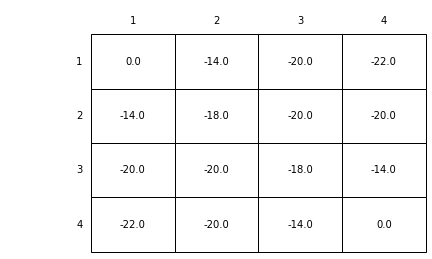

In [7]:
if __name__ == '__main__':

    # While the author suggests using in-place iterative policy evaluation,
    # Figure 4.1 actually uses out-of-place version.
    _, asycn_iteration = compute_state_value(in_place=True)
    values, sync_iteration = compute_state_value(in_place=False)
    draw_image(np.round(values, decimals=2))
    print('In-place: {} iterations'.format(asycn_iteration))
    print('Synchronous: {} iterations'.format(sync_iteration))

    #plt.savefig('../images/figure_4_1.png')
    plt.show()
    plt.close()  